In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### OFFENSE

In [17]:
nfl_teams=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", 
           "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LA", "MIA", 
           "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", 
           "TEN", "WAS"]

ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        ep_set_df = pd.read_csv('team_data/team-data/'+team+'/norm_eps.csv')
        ep_set = ep_set_df[ep_set_df['Down'] == down]
        ep_set = ep_set[((ep_set['Distance'] == distance) & (ep_set['Yardline'] >= distance)) | ((ep_set['Yardline'] < distance) 
                                                                                                    & (ep_set['Distance'] == ep_set['Yardline']))]
        ep_sets.append((team, ep_set))
    except:
        unfinished.append(team)
        pass

nfl = pd.read_csv('team_data/nfl_eps/norm_eps.csv')
ep_set_nfl = nfl[nfl['Down'] == down]
ep_set_nfl = ep_set_nfl[((ep_set_nfl['Distance'] == distance) & (ep_set_nfl['Yardline'] >= distance)) | ((ep_set_nfl['Yardline'] < distance) 
                                                                                                   & (ep_set_nfl['Distance'] == ep_set_nfl['Yardline']))]
#ep_sets.append(("NFL", ep_set_nfl))

print(unfinished)

[]


In [18]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['DET', 'BAL', 'TB', 'CIN', 'PHI', 'BUF', 'LA', 'WAS', 'ARI', 'MIN', 'GB', 'KC', 'LAC', 'JAX', 'CAR', 'ATL', 'SF', 'PIT', 'NYJ', 'DEN', 'TEN', 'HOU', 'SEA', 'MIA', 'NE', 'CHI', 'NO', 'DAL', 'LV', 'IND', 'NYG', 'CLE']


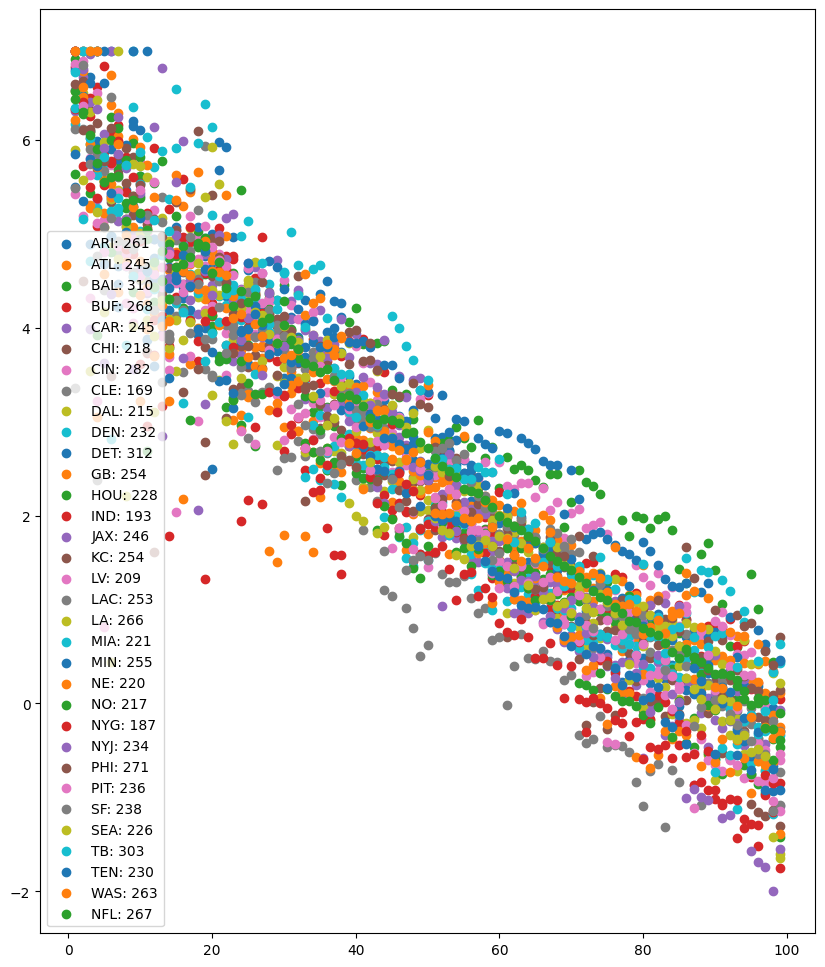

In [19]:
plt.figure(figsize=(10, 12))

for ep_set in ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

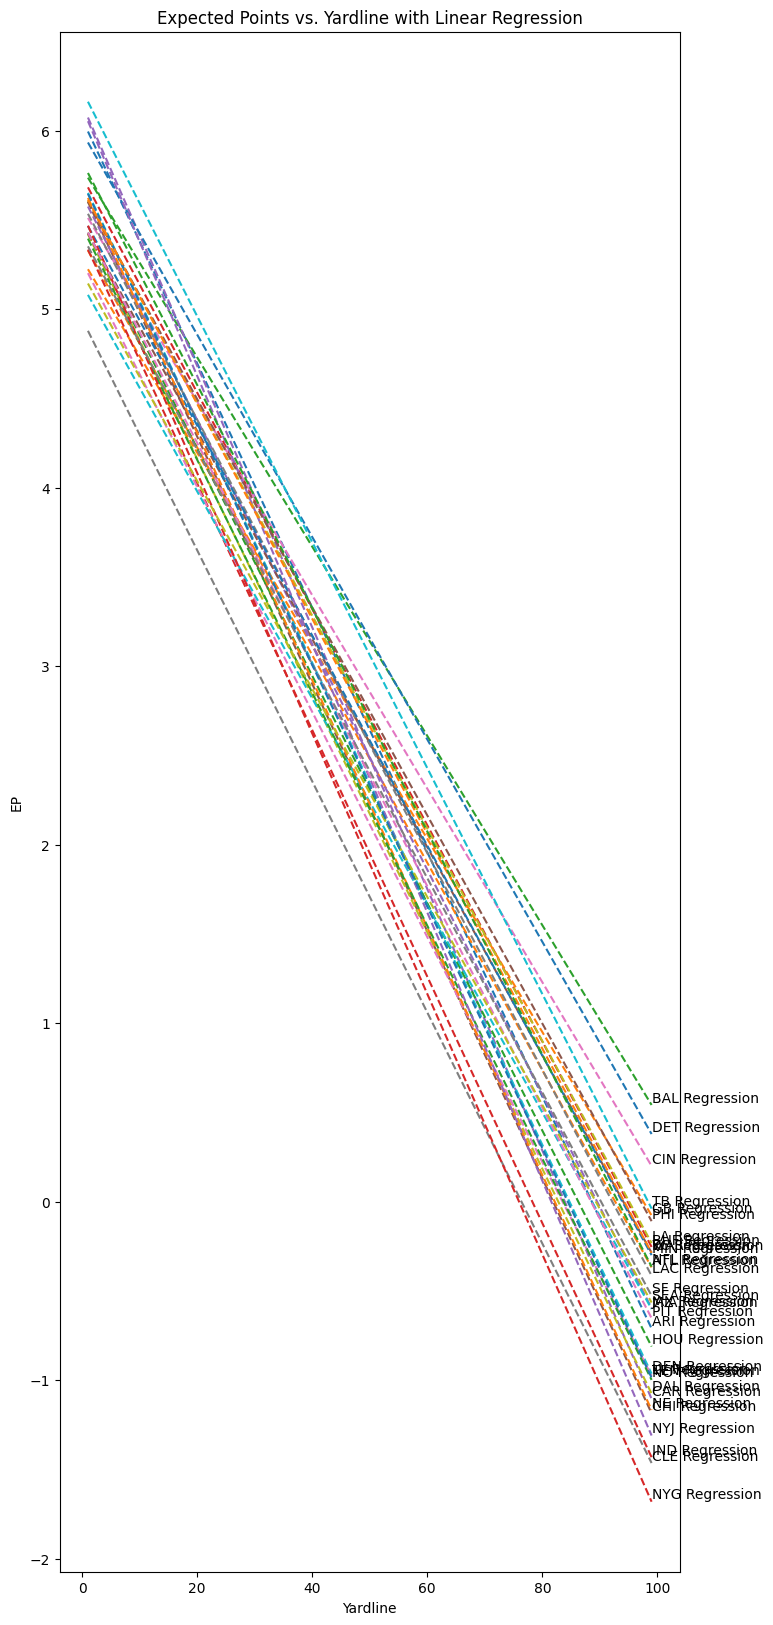

In [20]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [21]:
# Create a list of (name, total_EP) tuples
ep_sums = [(name, np.sum(df['EP'])) for name, df in ep_sets]

# Sort by total_EP
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)  # reverse=True for descending

# Print results
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")


DET: 312.53
BAL: 310.83
TB: 303.16
CIN: 282.74
PHI: 271.97
BUF: 268.78
LA: 266.06
WAS: 263.69
ARI: 261.62
MIN: 255.75
GB: 254.79
KC: 254.34
LAC: 253.46
JAX: 246.48
CAR: 245.99
ATL: 245.60
SF: 238.85
PIT: 236.46
NYJ: 234.82
DEN: 232.07
TEN: 230.70
HOU: 228.60
SEA: 226.68
MIA: 221.74
NE: 220.63
CHI: 218.63
NO: 217.67
DAL: 215.11
LV: 209.21
IND: 193.20
NYG: 187.48
CLE: 169.05


In [22]:
freq_df = pd.read_csv("frequency.csv")

In [23]:
# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
ep_sums = []
for name, df in ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)
rank = 1
for name, total in ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

 1: DET: 3.05
 2: BAL: 2.96
 3: TB : 2.87
 4: CIN: 2.78
 5: LA : 2.51
 6: BUF: 2.49
 7: WAS: 2.47
 8: MIN: 2.44
 9: PHI: 2.44
10: ARI: 2.43
11: GB : 2.41
12: LAC: 2.40
13: KC : 2.38
14: SF : 2.30
15: CAR: 2.28
16: ATL: 2.27
17: JAX: 2.25
18: NYJ: 2.23
19: PIT: 2.20
20: SEA: 2.20
21: HOU: 2.18
22: DEN: 2.12
23: TEN: 2.09
24: MIA: 2.03
25: NE : 2.00
26: DAL: 1.99
27: CHI: 1.94
28: NO : 1.90
29: LV : 1.88
30: IND: 1.81
31: NYG: 1.66
32: CLE: 1.36


### DEFENSE

In [24]:
def_ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        def_ep_set_df = pd.read_csv('team_data/team-data/'+team+'/norm_def_eps.csv')
        def_ep_set = def_ep_set_df[def_ep_set_df['Down'] == down]
        def_ep_set = def_ep_set[((def_ep_set['Distance'] == distance) & (def_ep_set['Yardline'] >= distance)) | ((def_ep_set['Yardline'] < distance) 
                                                                                                    & (def_ep_set['Distance'] == def_ep_set['Yardline']))]
        def_ep_sets.append((team, def_ep_set))
    except:
        unfinished.append(team)
        pass

print(unfinished)

[]


In [25]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(def_ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['SF', 'MIA', 'JAX', 'CAR', 'ARI', 'TEN', 'ATL', 'DAL', 'SEA', 'NYG', 'LA', 'NE', 'TB', 'CIN', 'NO', 'CLE', 'LV', 'CHI', 'KC', 'PIT', 'WAS', 'DET', 'HOU', 'BAL', 'NYJ', 'IND', 'GB', 'BUF', 'DEN', 'MIN', 'LAC', 'PHI']


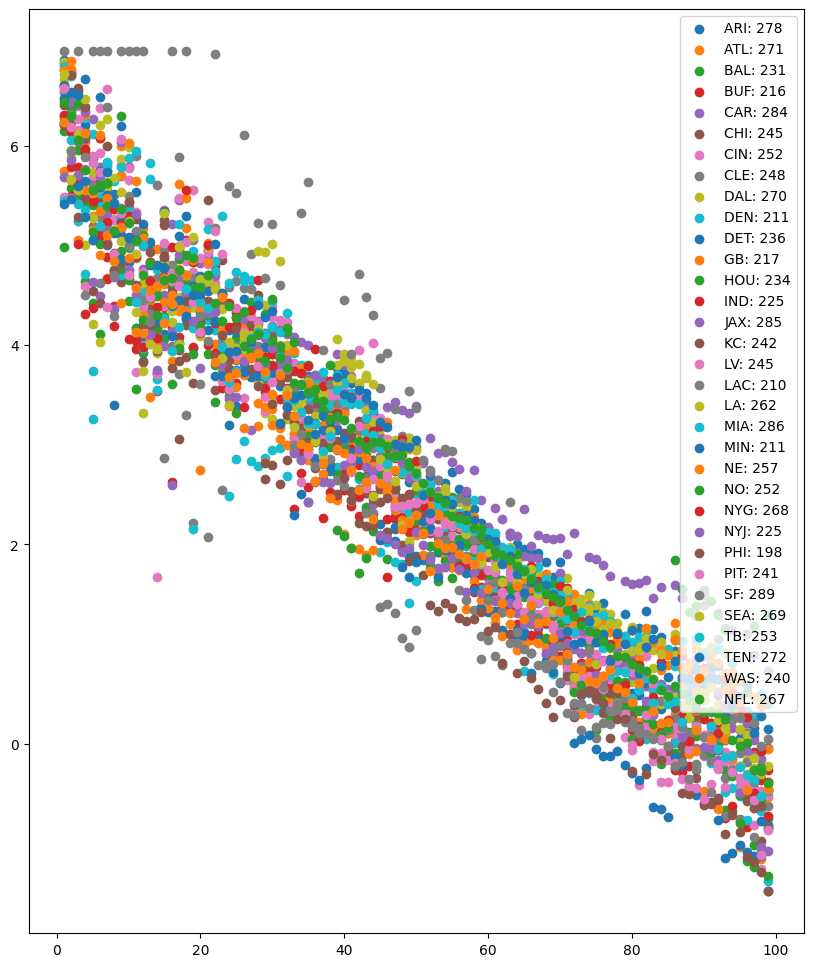

In [26]:
plt.figure(figsize=(10, 12))

for ep_set in def_ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

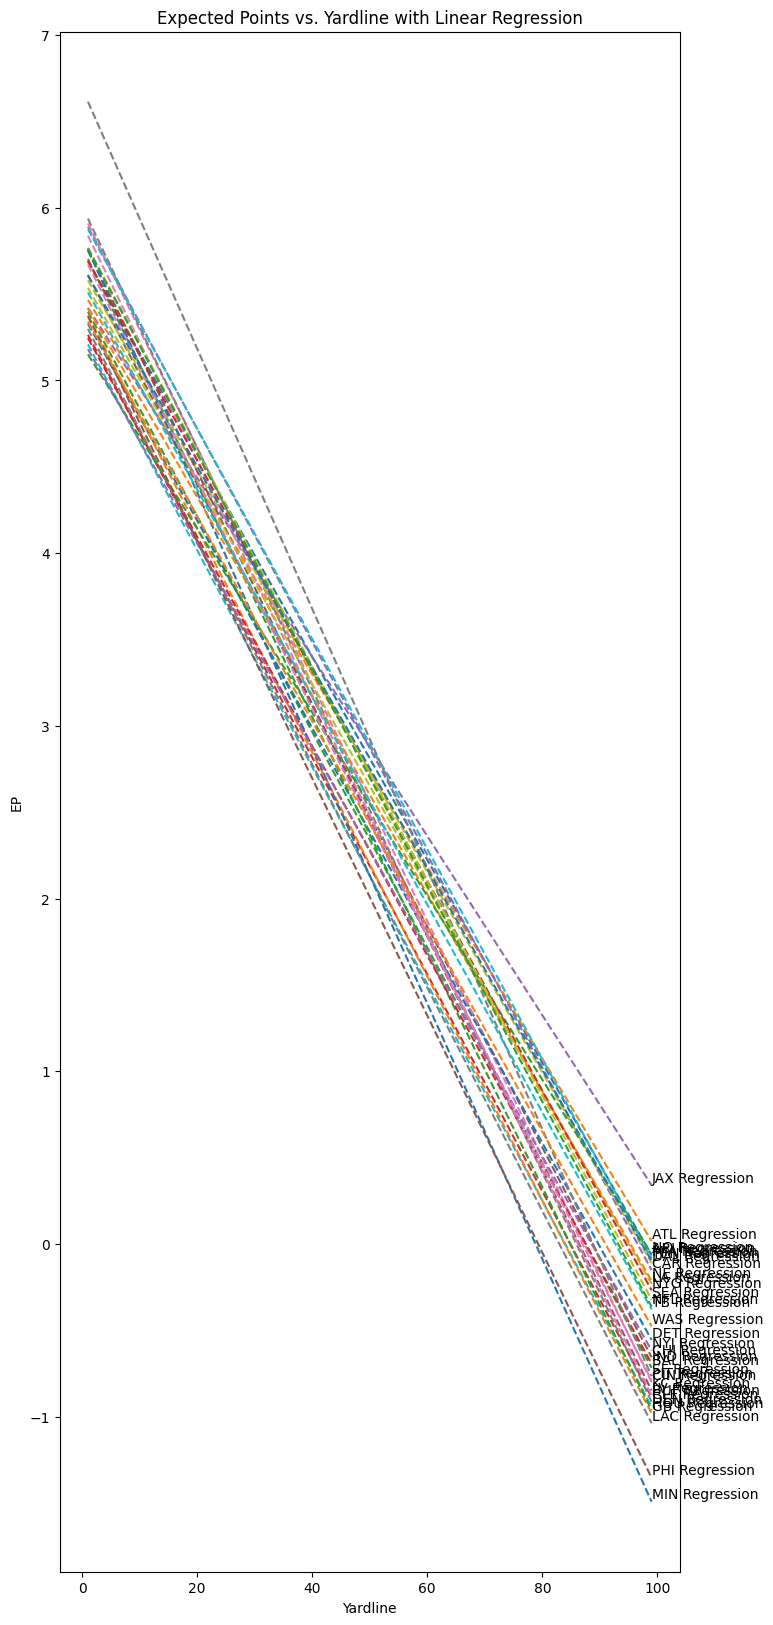

In [27]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in def_ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [28]:
# Create a list of (name, total_EP) tuples
def_ep_sums = [(name, np.sum(df['EP'])) for name, df in def_ep_sets]

# Sort by total_EP
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)  # reverse=False for ascending

# Print results
for name, total in def_ep_sums_sorted:
    print(f"{name}: {total:.2f}")

PHI: 198.89
LAC: 210.89
MIN: 211.07
DEN: 211.18
BUF: 216.68
GB: 217.61
IND: 225.33
NYJ: 225.89
BAL: 231.69
HOU: 234.62
DET: 236.25
WAS: 240.79
PIT: 241.54
KC: 242.76
CHI: 245.25
LV: 245.61
CLE: 248.66
NO: 252.04
CIN: 252.92
TB: 253.96
NE: 257.51
LA: 262.50
NYG: 268.46
SEA: 269.58
DAL: 270.75
ATL: 271.42
TEN: 272.70
ARI: 278.32
CAR: 284.07
JAX: 285.11
MIA: 286.60
SF: 289.47


In [29]:
freq_df = pd.read_csv("frequency.csv")

# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
def_ep_sums = []
for name, df in def_ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    def_ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)
rank = 1
for name, total in def_ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

 1: LAC: 1.84
 2: PHI: 1.84
 3: MIN: 1.91
 4: DEN: 1.95
 5: GB : 2.00
 6: BUF: 2.00
 7: NYJ: 2.08
 8: IND: 2.09
 9: HOU: 2.14
10: DET: 2.15
11: WAS: 2.17
12: BAL: 2.20
13: KC : 2.25
14: LV : 2.27
15: CHI: 2.28
16: NO : 2.28
17: PIT: 2.30
18: CLE: 2.32
19: CIN: 2.33
20: TB : 2.43
21: NE : 2.44
22: LA : 2.47
23: NYG: 2.54
24: ATL: 2.55
25: SEA: 2.55
26: TEN: 2.56
27: SF : 2.59
28: DAL: 2.60
29: ARI: 2.66
30: MIA: 2.68
31: CAR: 2.70
32: JAX: 2.74


### Cumulative Ranking

In [30]:
# Convert both lists to dictionaries
off_dict = dict(ep_sums_sorted)
def_dict = dict(def_ep_sums_sorted)

# Compute the difference per team (offense - defense)
diff_sums = []
for team in off_dict:
    diff = off_dict[team] - def_dict.get(team, 0)
    diff_sums.append((team, diff))

# Sort and print the differences in descending order
diff_sums_sorted = sorted(diff_sums, key=lambda x: x[1], reverse=True)

for rank, (team, diff) in enumerate(diff_sums_sorted, start=1):
    print(f"{rank:2d}: {team:<3}: {diff:.2f}")

 1: DET: 0.90
 2: BAL: 0.76
 3: PHI: 0.60
 4: LAC: 0.56
 5: MIN: 0.54
 6: BUF: 0.49
 7: CIN: 0.45
 8: TB : 0.43
 9: GB : 0.41
10: WAS: 0.29
11: DEN: 0.17
12: NYJ: 0.14
13: KC : 0.13
14: HOU: 0.05
15: LA : 0.04
16: PIT: -0.10
17: ARI: -0.23
18: ATL: -0.28
19: IND: -0.28
20: SF : -0.29
21: CHI: -0.34
22: SEA: -0.36
23: NO : -0.38
24: LV : -0.39
25: CAR: -0.42
26: NE : -0.44
27: TEN: -0.47
28: JAX: -0.49
29: DAL: -0.61
30: MIA: -0.65
31: NYG: -0.88
32: CLE: -0.96
